# A Continuous Control PPO Agent for the Reacher Environment

In this project we have created a Proximal Policy Optimization (PPO) agent that is able to learn how to control a double-jointed arm in order to keep the arm's hand within a moving goal location. The implementation is derived from the solution to a previous Udacity Deep Reinforcement Learning Nanodegree exercise in which a PPO-based agent learns to play Pong.

The requirements provided for two options, one option with a single agent and a second option with twenty parallel agents. In this project the twenty-agent option was implemented.

## Learning Algorithm

In this project the agent's learning algorithm is Proximal Policy Optimization (PPO) using a Monte Carlo policy gradient (as opposed to using a baseline). In PPO, training is performed by gathering a set of trajectories (state and action tuples) as well as action probabilities and rewards. The training then iterates over the trajectories a small number of times in order to optimize the policy weights via gradient descent.

The gradient descent's loss function is a surrogate loss function that enables the limited reuse of the trajectories even as the policy weights (and thus the action probabilities) are adjusted during training. An important feature of this surrogate loss function is clipping which prevents catastrophic divergence from the true loss function.

Two identically-structured neural networks map the state to the action values. One network is used as a slowly-changing reference to which the results of the other can be compared and updated.

A simple neural network creates the policy that maps states to the mean and standard deviations of normal distributions from which the actions are sampled. The NN consists of:
- two fully-connected layers of 256 and 512 units with ReLU activation
- a fully-connected layer of 4 units (the action space) to provide the means of the normal distributions; a tanh activation function forces the output to the range [-1.0, 1.0] to better match the action space
- a fully-connected layer of 4 units (the action space) to provide the standard deviations of the normal distributions; a sigmoid activation function forces the output to the range [0.0, 1.0] to better match the action space

Note that the constraints on the mean and standard deviation will still result in some sampled values outside of the valid action range, and clipping of the sampled actions will ensure action validity.

The local network weights are updated using an Adam optimizer using the clipped surrogate loss function as described above.

The hyperparameter values used were:

```
DISCOUNT_RATE = .99
EPSILON = 0.1
BETA = .01
# SDG_epoch is number of times to reuse trajectories; 1=REINFORCE
SGD_EPOCH = 3
LEARN_RATE = 1e-3
```

## Code Structure

### model.py

`model.py` has the PyTorch deep neural network model that implements the core of the policy.

### ppo_agent.py

`ppo_agent.py` provides the agent logic around the neural network. It creates an instance of the NN from model.py. Its interface methods include:
- parameters: a property to obtain the policy's learnable parameters
- act(): given states, return sampled actions and their probability density; for use while collecting trajectories and for agent evaluation
- states_actions_to_prob(): given states and actions, return their probability density
- save(), load(): save and load the model

### ppo.py

`ppo.py` has two functions:
- train_ppo(): perform training of the given agent and return the list of mean episode rewards
- clipped_surrogate(): return the PPO surrogate loss function using a Monte Carlo policy gradient

### model.py

`model.py` has the Policy class which implements the deep neural network that forms the heart of the PPO agent.

### utils.py

`utils.py` has two functions:
- collect_trajectories(): step the parallel agents through the environment, gather up the trajectories of each agent, and return the probability densities, states, actions, and rewards
- torch_isinf_any(): a simple convenience function that tests for inf or -inf in any tensor value; newer versions of torch have an equivalent function built-in

## Sample Plot of Training Rewards

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from ppo import GOAL_WINDOW_LEN
with open('episode_rewards.txt') as fp:
    mean_rewards = [float(x) for x in fp.read().splitlines()]
print('Environment solved in {:d} episodes!'.format(len(mean_rewards) - GOAL_WINDOW_LEN))

Environment solved in 4900 episodes!


### Not yet solved...

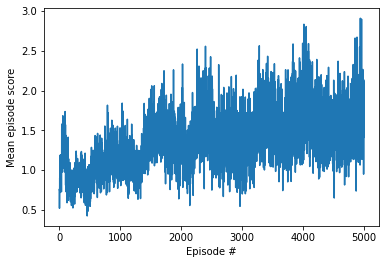

In [4]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(mean_rewards)), mean_rewards)
plt.ylabel('Mean episode score')
plt.xlabel('Episode #')
plt.show()

## Ideas for Future Work

No serious attempt has been made to optimize the model hyperparameters or the neural network model architecture. Future work would include experimenting with adjustments in these areas.

Other areas in which to search for improvement include:
- use a baseline instead of Monte Carlo policy gradient
- try other algorithms (A3C, DDPG)